# Predicting ROAS Based on App Installations
This notebook analyzes how the number of app installations affects Return on Ad Spend (ROAS). We explore time series trends, build predictive models, and evaluate day-by-day ROAS changes.

## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## 2. Load and Preview Data

In [3]:
data = pd.read_excel('App383B_ROAS90d_0503.xlsx')
data.head()

,day,installs,roas_ad_d0,roas_ad_d1,roas_ad_d2,roas_ad_d3,roas_ad_d4,roas_ad_d5,roas_ad_d6,roas_ad_d7,...,roas_ad_d53,roas_ad_d54,roas_ad_d55,roas_ad_d56,roas_ad_d57,roas_ad_d58,roas_ad_d59,roas_ad_d60,roas_ad_d75,roas_ad_d90
0,2024-12-12,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-12-13,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-12-14,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-12-15,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-12-16,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Filter Data after 2024-12-16

In [4]:
data = data[data['day'] > '2024-12-16']
data.reset_index(drop=True, inplace=True)
data

,day,installs,roas_ad_d0,roas_ad_d1,roas_ad_d2,roas_ad_d3,roas_ad_d4,roas_ad_d5,roas_ad_d6,roas_ad_d7,...,roas_ad_d53,roas_ad_d54,roas_ad_d55,roas_ad_d56,roas_ad_d57,roas_ad_d58,roas_ad_d59,roas_ad_d60,roas_ad_d75,roas_ad_d90
0,2024-12-17,25,0.0368,0.0398,0.0398,0.0403,0.0405,0.0405,0.0428,0.0429,...,0.0462,0.0462,0.0462,0.0462,0.0462,0.0462,0.0462,0.0462,0.0462,0.0462
1,2024-12-18,59,0.0320,0.0320,0.0324,0.0324,0.0324,0.0327,0.0327,0.0338,...,0.0392,0.0392,0.0392,0.0402,0.0402,0.0402,0.0402,0.0402,0.0436,0.0437
2,2024-12-19,82,0.0950,0.0976,0.1007,0.1014,0.1022,0.1025,0.1025,0.1025,...,0.1073,0.1073,0.1073,0.1073,0.1073,0.1073,0.1073,0.1073,0.1073,0.1073
3,2024-12-20,80,0.2082,0.2091,0.2604,0.3956,0.3961,0.3961,0.3961,0.4190,...,0.5337,0.5357,0.5357,0.5359,0.5362,0.5362,0.5362,0.5362,0.5378,0.5378
4,2024-12-21,82,0.2032,0.2067,0.2115,0.2131,0.2144,0.2151,0.2164,0.2164,...,0.2367,0.2367,0.2367,0.2367,0.2367,0.2369,0.2369,0.2369,0.2378,0.2378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2025-02-28,11169,0.6692,0.6808,0.6902,0.7021,0.7124,0.7169,0.7169,0.7169,...,0.7169,0.7169,0.7169,0.7169,0.7169,0.7169,0.7169,0.7169,0.7169,0.7169
74,2025-03-01,9362,0.7389,0.7557,0.7708,0.7826,0.7869,0.7869,0.7869,0.7869,...,0.7869,0.7869,0.7869,0.7869,0.7869,0.7869,0.7869,0.7869,0.7869,0.7869
75,2025-03-02,8746,0.7226,0.7410,0.7545,0.7575,0.7575,0.7575,0.7575,0.7575,...,0.7575,0.7575,0.7575,0.7575,0.7575,0.7575,0.7575,0.7575,0.7575,0.7575
76,2025-03-03,12668,0.6637,0.6788,0.6834,0.6834,0.6834,0.6834,0.6834,0.6834,...,0.6834,0.6834,0.6834,0.6834,0.6834,0.6834,0.6834,0.6834,0.6834,0.6834


## 4. Time Series of Installs and ROAS

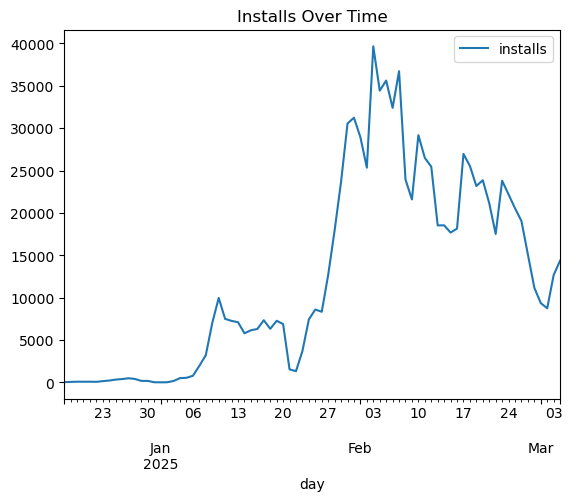

In [5]:
data.plot(kind='line', x='day', y='installs', title='Installs Over Time');


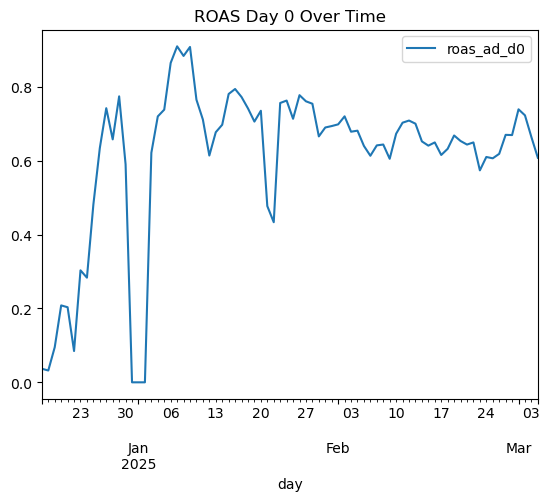

In [6]:
data.plot(kind='line', x='day', y='roas_ad_d0', title='ROAS Day 0 Over Time');

## 5. ROAS vs Installs Scatter Plot
#### check whether there is a relationship between ROAS ans Installs


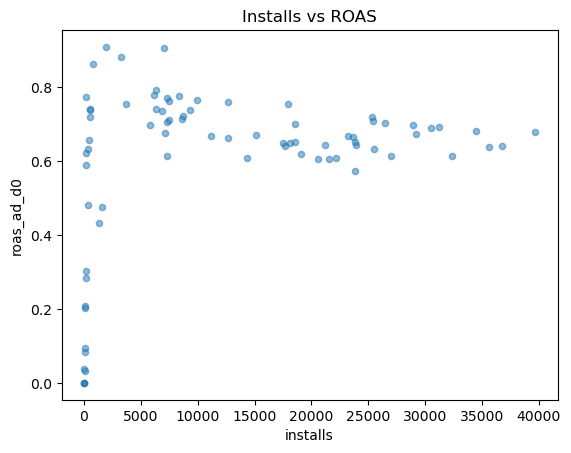

In [7]:
data.plot(kind='scatter', x='installs', y='roas_ad_d0', alpha=0.5, title='Installs vs ROAS');

In [8]:
# Initially, roas increases when installs increases. However, after the number of install increases to nearly 3000, roas start to decrease


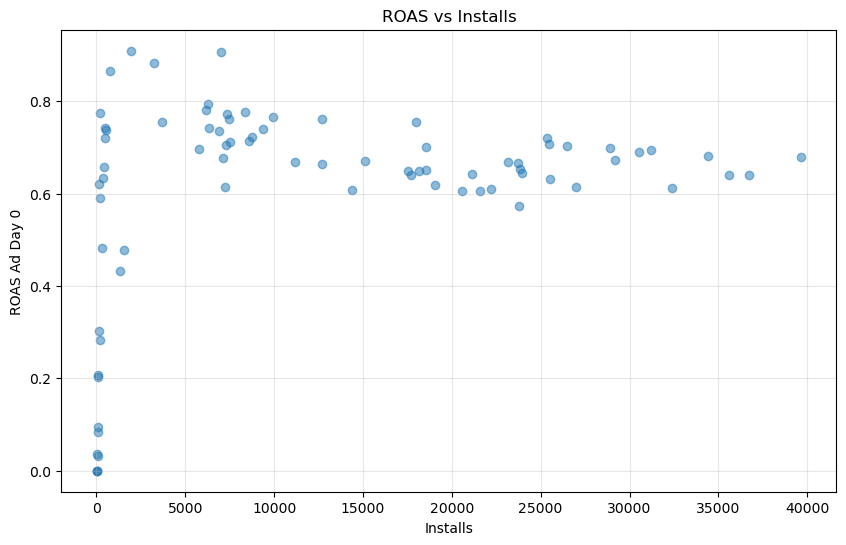


 Polynomial Regression(Degree 2):
Intercept: 0.4578
Coefficient for x^1: 0.000027
Coefficient for x^2: -0.000000
R² Score: 0.2320
RMSE: 0.1920

 Polynomial Regression(Degree 3):
Intercept: 0.3937
Coefficient for x^1: 0.000072
Coefficient for x^2: -0.000000
Coefficient for x^3: 0.000000
R² Score: 0.3751
RMSE: 0.1732

 Polynomial Regression(Degree 4):
Intercept: 0.4964
Coefficient for x^1: 0.000000
Coefficient for x^2: 0.000000
Coefficient for x^3: -0.000000
Coefficient for x^4: 0.000000
R² Score: 0.1664
RMSE: 0.2000


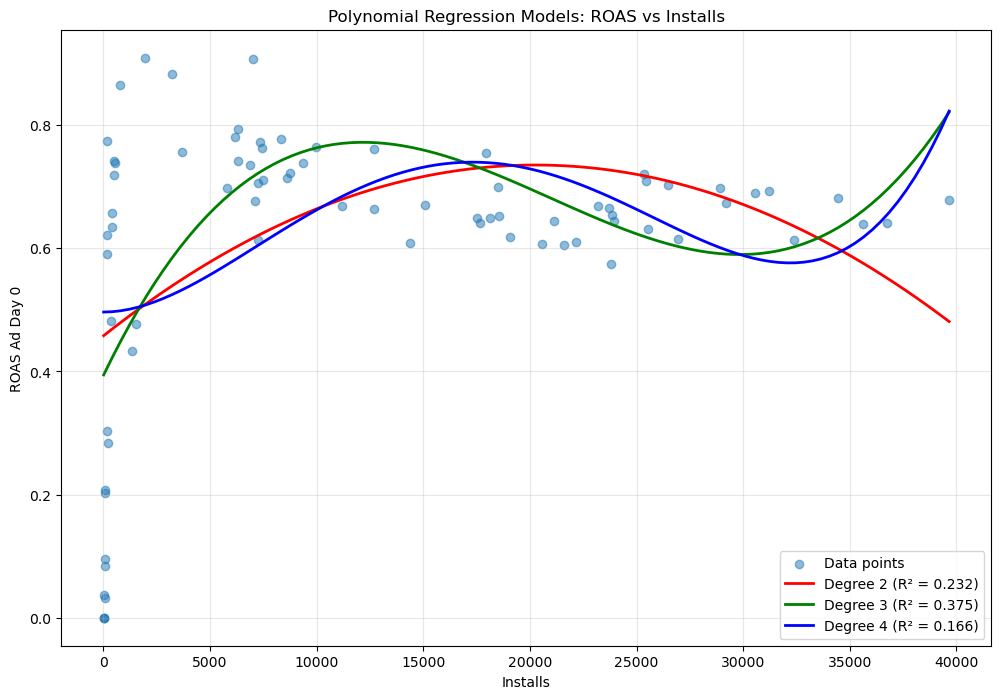

In [10]:
# Step 1: Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(data['installs'], data['roas_ad_d0'], alpha=0.5)
plt.title('ROAS vs Installs')
plt.xlabel('Installs')
plt.ylabel('ROAS Ad Day 0')
plt.grid(True, alpha=0.3)
plt.show()


degrees = [2,3,4]
colors = ['red', 'green', 'blue']
plt.figure(figsize = (12,8))

# Plot original data points
plt.scatter(data['installs'], data['roas_ad_d0'], alpha = 0.5, label = 'Data points')

#Prepare data for modelling
X = data['installs'].values.reshape(-1,1)
y = data['roas_ad_d0'].values

# Generate a smooth curve for predictions
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Create and plot models of different degrees
for i, degree in enumerate(degrees):
    #Create polynomial features
    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(X)

    #Train the model
    model = LinearRegression()
    model.fit(X_poly, y)

    X_curve_poly = poly.transform(X_curve)
    y_pred = model.predict(X_curve_poly)

    #Plot the polynomial curve
    plt.plot(X_curve, y_pred, color = colors[i], linewidth = 2, label = f'Degree {degree} (R² = {r2_score(y, model.predict(X_poly)):.3f})')

    #Print the model coefficients
    coeffs = model.coef_
    intercept = model.intercept_

    print(f"\n Polynomial Regression(Degree {degree}):")
    print(f"Intercept: {intercept:.4f}")

    for j, coeff in enumerate(coeffs[1:]):
        print(f"Coefficient for x^{j+1}: {coeff:.6f}")
    y_poly_pred = model.predict(X_poly)
    print(f"R² Score: {r2_score(y, y_poly_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y, y_poly_pred)):.4f}")

plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Polynomial Regression Models: ROAS vs Installs')
plt.xlabel('Installs')
plt.ylabel('ROAS Ad Day 0')
plt.show()
 



## 6. Segment Data by Install Volume

In [11]:
test1 = data[data['installs'] < 500]
test2 = data[data['installs'] >= 500]

## 7. Regression Analysis by Segment

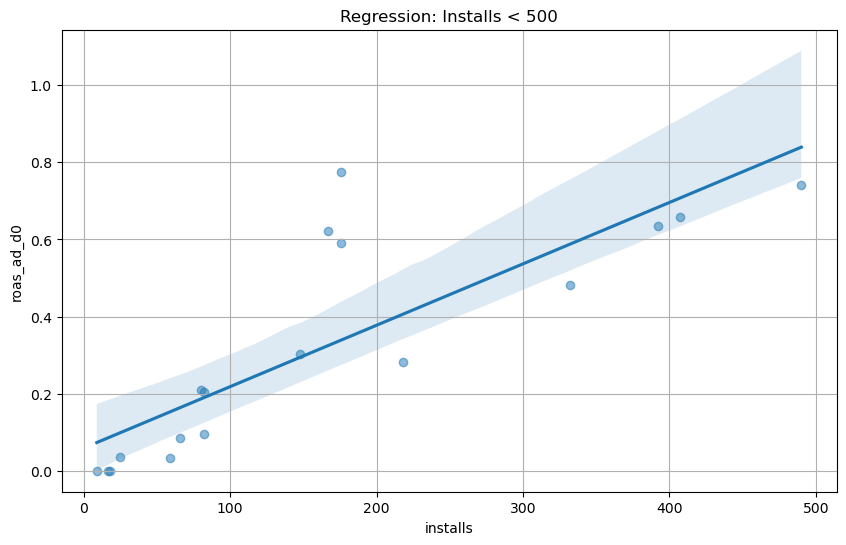

In [12]:
plt.figure(figsize=(10, 6))
sns.regplot(x='installs', y='roas_ad_d0', data=test1, scatter_kws={'alpha': 0.5})
plt.title('Regression: Installs < 500')
plt.grid(True)


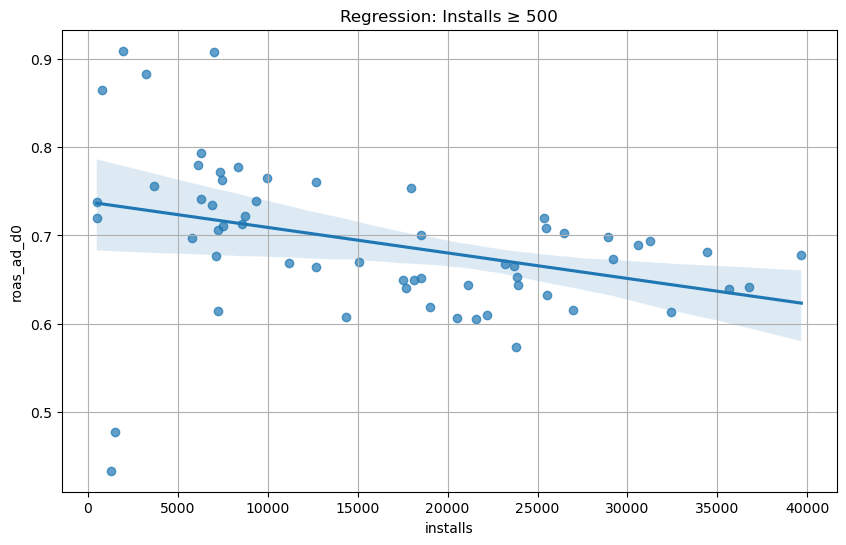

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(x='installs', y='roas_ad_d0', data=test2, scatter_kws={'alpha': 0.7})
plt.title('Regression: Installs ≥ 500')
plt.grid(True)

## 8. Polynomial Regression Modeling

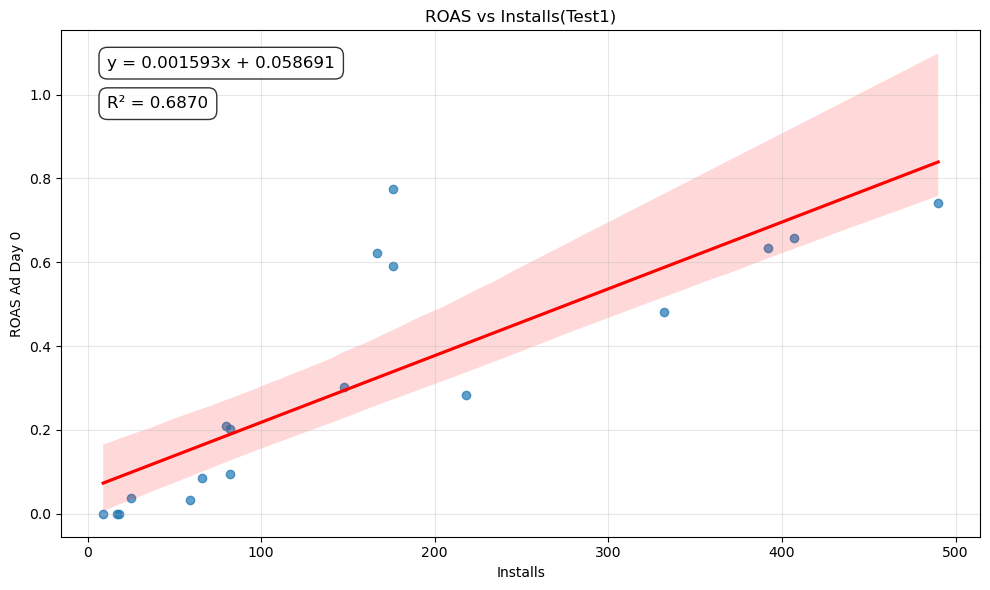

Test1 Linear Regression:
Equation: y = 0.001593x + 0.058691
R² = 0.6870


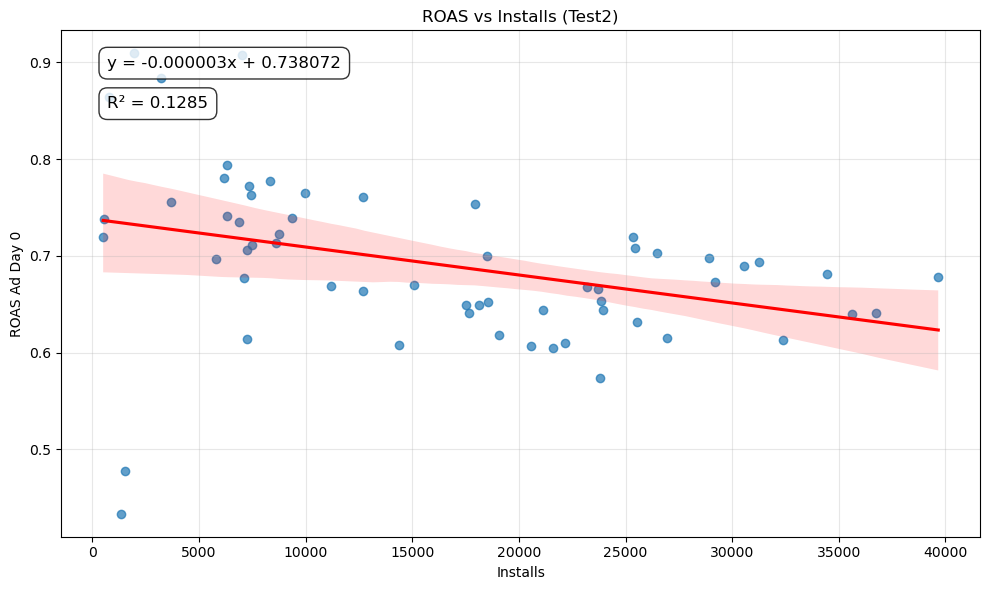

Test2 Linear Regression:
Equation: y = -0.000003x + 0.738072
R² = 0.1285


In [15]:
# Function to create plot with regression equation
def plot_with_equation(data, title):
    X = data['installs'].values.reshape(-1,1)
    y = data['roas_ad_d0'].values

    #Fit linear Regression
    model = LinearRegression()
    model.fit(X, y)

    #Get coefficients
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X,y)

    #Create plot
    plt.figure(figsize = (10, 6))

    #Plot scatter and regression line
    sns.regplot(x = 'installs', y = 'roas_ad_d0', data = data, scatter_kws = {'alpha':0.7}, line_kws = {'color':'red'})

    # Format equation to display
    equation = f'y = {slope:.6f}x + {intercept:.6f}'
    r2_text = f'R² = {r_squared:.4f}'

    # Add equation text to plot
    plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, ha='left', va='top',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

    # Add R-squared value
    plt.annotate(r2_text, xy=(0.05, 0.87), xycoords='axes fraction',
                 fontsize=12, ha='left', va='top',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

    plt.title(title)
    plt.xlabel('Installs')
    plt.ylabel('ROAS Ad Day 0')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    return slope, intercept, r_squared

# Plot test1
slope1, intercept1, r2_1 = plot_with_equation(test1, 'ROAS vs Installs(Test1)')
plt.show()

print(f"Test1 Linear Regression:")
print(f"Equation: y = {slope1:.6f}x + {intercept1:.6f}")
print(f"R² = {r2_1:.4f}")

# Plot test2
slope2, intercept2, r2_2 = plot_with_equation(test2, 'ROAS vs Installs (Test2)')
plt.show()

print(f"Test2 Linear Regression:")
print(f"Equation: y = {slope2:.6f}x + {intercept2:.6f}")
print(f"R² = {r2_2:.4f}")
    
    

In [ ]:
# Therefore, with ads having installs < 500 => roas = 0.001593 installs + 0.058691
# AND with ads having installs > 500 => roas = -0.000003 installs + 0.738072

## 9. ROAS Trends Over First and Second 7 Days

In [16]:
first_7_days = data.columns[2:9].tolist()
second_7_days = data.columns[9:17].tolist()
alldays = data.columns[2:].tolist()

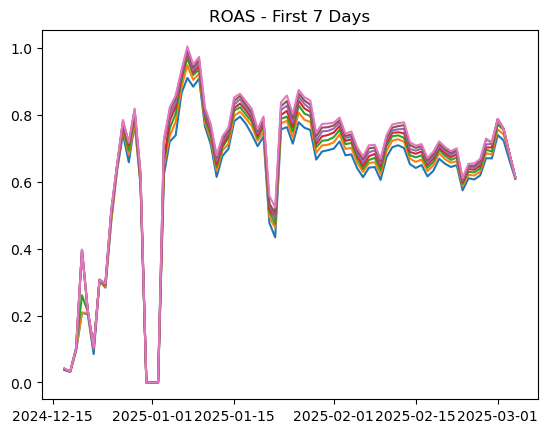

In [18]:
# Plot first 7 days
for col in first_7_days:
    plt.plot(data['day'], data[col], label=col)
plt.title('ROAS - First 7 Days')
plt.show()

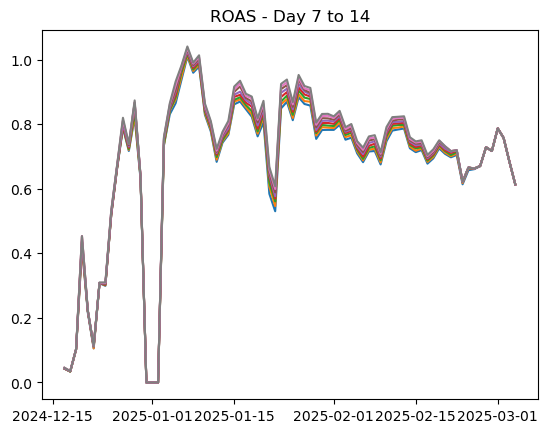

In [19]:
# Plot second 7 days
for col in second_7_days:
    plt.plot(data['day'], data[col], label=col)
plt.title('ROAS - Day 7 to 14')
plt.show()

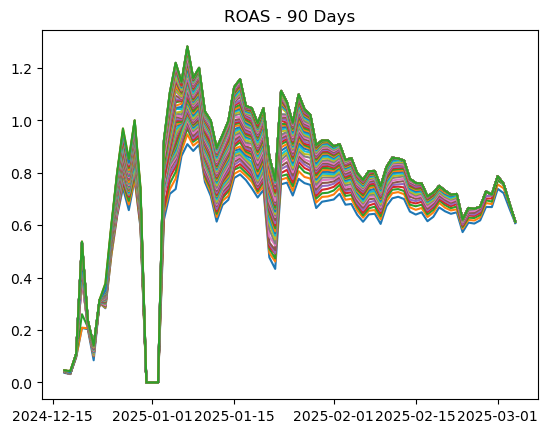

In [20]:
for col in alldays:
    plt.plot(data['day'], data[col], label=col)
plt.title('ROAS - 90 Days')
plt.show()

It is evident that the ROAS trends on subsequent days closely mirror the pattern observed on Day 0, with only minor variations in performance over time. Therefore, we adopt a simplified yet effective approach:
we first use the number of installations to predict Day 0 ROAS, then apply the average daily ROAS change to project the values for the following day.

## 10. Day-to-Day ROAS Percentage Change Analysis

In [24]:
percentage_changes = []

In [25]:
for i in range(len(alldays)-1):
    current = alldays[i]
    previous = alldays[i+1]

    pct_change_col = f'pct_change_{previous}_to_{current}'
    data[pct_change_col] = (data[current] - data[previous]) / data[previous] * 100
    percentage_changes.append(pct_change_col)

data['avg_daily_pct_change'] = data[percentage_changes].mean(axis = 1)

# Display summary statistics
print("Summary of day-to-day percentage changes:")
print(data[percentage_changes].describe())


print("\nAverage daily percentage change stats:")
print(data['avg_daily_pct_change'].describe())

# Overall average percentage change (average across all rows and columns)
overall_avg_pct_change = data[percentage_changes].stack().mean()
print(f"\nOverall average percentage change: {overall_avg_pct_change:.4f}%")

Summary of day-to-day percentage changes:
       pct_change_roas_ad_d1_to_roas_ad_d0  \
count                            75.000000   
mean                             -2.527260   
std                               1.881836   
min                             -15.300000   
25%                              -2.712439   
50%                              -2.309136   
75%                              -1.929234   
max                               0.000000   

       pct_change_roas_ad_d2_to_roas_ad_d1  \
count                            75.000000   
mean                             -2.003687   
std                               2.167554   
min                             -19.700461   
25%                              -2.145235   
50%                              -1.789264   
75%                              -1.422906   
max                               0.000000   

       pct_change_roas_ad_d3_to_roas_ad_d2  \
count                            75.000000   
mean                             -1.

In [26]:
data.head()

,day,installs,roas_ad_d0,roas_ad_d1,roas_ad_d2,roas_ad_d3,roas_ad_d4,roas_ad_d5,roas_ad_d6,roas_ad_d7,...,pct_change_roas_ad_d54_to_roas_ad_d53,pct_change_roas_ad_d55_to_roas_ad_d54,pct_change_roas_ad_d56_to_roas_ad_d55,pct_change_roas_ad_d57_to_roas_ad_d56,pct_change_roas_ad_d58_to_roas_ad_d57,pct_change_roas_ad_d59_to_roas_ad_d58,pct_change_roas_ad_d60_to_roas_ad_d59,pct_change_roas_ad_d75_to_roas_ad_d60,pct_change_roas_ad_d90_to_roas_ad_d75,avg_daily_pct_change
0,2024-12-17,25,0.0368,0.0398,0.0398,0.0403,0.0405,0.0405,0.0428,0.0429,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.357596
1,2024-12-18,59,0.0320,0.0320,0.0324,0.0324,0.0324,0.0327,0.0327,0.0338,...,0.000000,0.0,-2.487562,0.000000,0.000000,0.0,0.0,-7.798165,-0.228833,-0.493174
2,2024-12-19,82,0.0950,0.0976,0.1007,0.1014,0.1022,0.1025,0.1025,0.1025,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.194346
3,2024-12-20,80,0.2082,0.2091,0.2604,0.3956,0.3961,0.3961,0.3961,0.4190,...,-0.373343,0.0,-0.037320,-0.055949,0.000000,0.0,0.0,-0.297508,0.000000,-1.356986
4,2024-12-21,82,0.2032,0.2067,0.2115,0.2131,0.2144,0.2151,0.2164,0.2164,...,0.000000,0.0,0.000000,0.000000,-0.084424,0.0,0.0,-0.378469,0.000000,-0.252272


Summary of day-to-day percentage changes:
       pct_change_roas_ad_d1_to_roas_ad_d0  \
count                            75.000000   
mean                             -2.527260   
std                               1.881836   
min                             -15.300000   
25%                              -2.712439   
50%                              -2.309136   
75%                              -1.929234   
max                               0.000000   

       pct_change_roas_ad_d2_to_roas_ad_d1  \
count                            75.000000   
mean                             -2.003687   
std                               2.167554   
min                             -19.700461   
25%                              -2.145235   
50%                              -1.789264   
75%                              -1.422906   
max                               0.000000   

       pct_change_roas_ad_d3_to_roas_ad_d2  \
count                            75.000000   
mean                             -1.

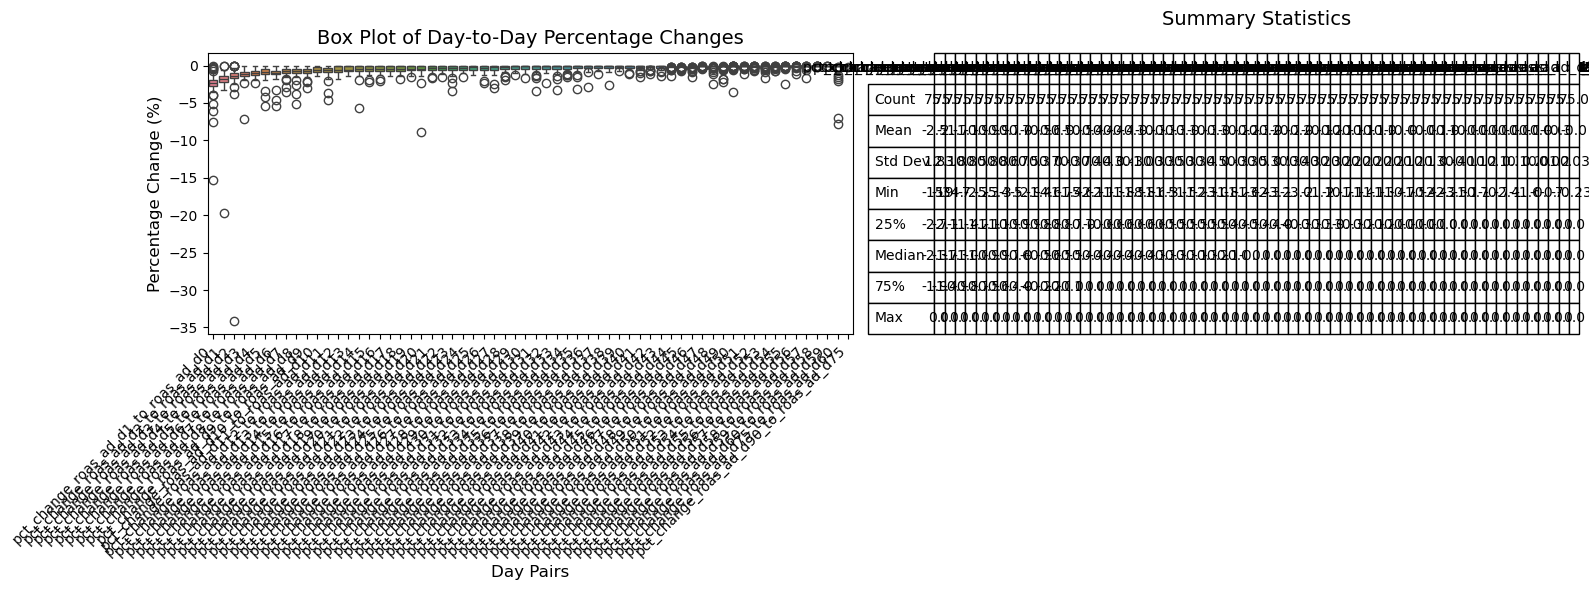

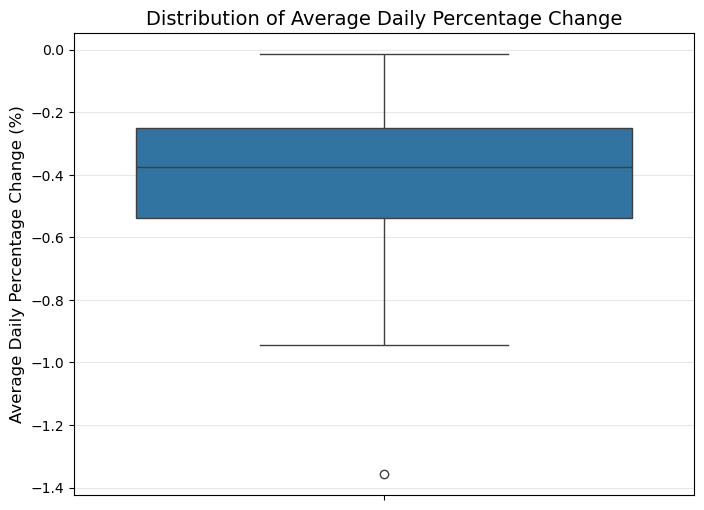

In [27]:
# Display summary statistics
print("Summary of day-to-day percentage changes:")
print(data[percentage_changes].describe())

print("\nAverage daily percentage change stats:")
print(data['avg_daily_pct_change'].describe())

# Overall average percentage change
overall_avg_pct_change = data[percentage_changes].stack().mean()
print(f"\nOverall average percentage change: {overall_avg_pct_change:.4f}%")

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Create a box plot of the percentage changes
pct_change_data = data[percentage_changes]
sns.boxplot(data=pct_change_data, ax=ax1)
ax1.set_title('Box Plot of Day-to-Day Percentage Changes', fontsize=14)
ax1.set_ylabel('Percentage Change (%)', fontsize=12)
ax1.set_xlabel('Day Pairs', fontsize=12)

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# 2. Create a table with summary statistics
summary_stats = pct_change_data.describe().round(2)
# Convert row indexes to more readable format
summary_stats.index = ['Count', 'Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max']

# Create a table and remove the axes
ax2.axis('off')
table = ax2.table(
    cellText=summary_stats.values,
    rowLabels=summary_stats.index,
    colLabels=summary_stats.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Adjust table size

# Add a title for the table
ax2.set_title('Summary Statistics', fontsize=14, pad=20)

# Adjust layout
plt.tight_layout()
plt.show()

# If you want a separate boxplot for the average daily percentage change
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['avg_daily_pct_change'])
plt.title('Distribution of Average Daily Percentage Change', fontsize=14)
plt.ylabel('Average Daily Percentage Change (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

On average, ROAS decreases by approximately 0.4% per day, with a standard deviation of 0.22%.
As a result, our predictive approach will involve using the number of installations to estimate the Day 0 ROAS, and subsequently projecting the ROAS for future days by applying a consistent daily decay rate.
Specifically, we assume a compounding daily decline of 0.4% in ROAS for each subsequent day following the initial estimate.